In [1]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
sns.set_style('ticks')
font = {
    'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 2,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

# Parse and plot spot instance prices

In [2]:
import pandas as pd
from datetime import datetime
import os

import pylab
def per_state_cases(df, states=None, cumulative=True,
                    log_scale=False):
    if states is None:
        states = sorted(list(set(list(df["state"]))))
    
    fig, ax = plt.subplots(figsize=(10,4))
    
    for state in states:
        per_state_df = df[df["state"] == state][
            ["date", "positive"]
        ]
        grouped_per_state_df = per_state_df.groupby(
            "date").sum().reset_index()
        
        dates = list(grouped_per_state_df["date"])
        dates = [datetime.strptime(str(x), '%Y%m%d') for x in dates]
        first_date = dates[0]
        total_cases = list(grouped_per_state_df["positive"])
        if not cumulative:
            total_cases = [0] + total_cases
            total_cases = [total_cases[i] - total_cases[i-1]
                           for i in range(1, len(total_cases))]
        
        ax.plot([(x - first_date).total_seconds() / (3600 * 24) for x in dates],
                total_cases, label=state)

    if cumulative:
        ax.set_ylabel("Number of\ntotal cases")
    else:
        ax.set_ylabel("Number of\nnew cases")
    ax.set_xlabel("Time (days)")
    if log_scale:
        ax.set_yscale('log')
        ax.set_xlim([5, None])
    else:
        ax.set_ylim([0, None])
        ax.set_xlim([0, None])
    sns.despine()

    leg = plt.figlegend(ncol=5, frameon=False, labelspacing=0.25,
                        columnspacing=0.8, handlelength=1.5,
                        loc='upper center')

    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    y_offset = 0.05
    bb.y0 += y_offset
    bb.y1 += y_offset
    leg.set_bbox_to_anchor(bb, transform=ax.transAxes)

    plt.show()

In [3]:
import pandas as pd
from datetime import datetime
import os

import pylab
def per_state_positivity_rate(df, states=None):
    if states is None:
        states = sorted(list(set(list(df["state"]))))
    
    fig, ax = plt.subplots(figsize=(10,4))
    
    np.set_printoptions(precision=3)
    for state in states:
        per_state_df = df[df["state"] == state][
            ["date", "positive", "negative"]
        ]
        grouped_per_state_df = per_state_df.groupby(
            "date").sum().reset_index()
        
        dates = list(grouped_per_state_df["date"])
        dates = [datetime.strptime(str(x), '%Y%m%d') for x in dates]
        first_date = dates[0]
        positive_cases = [0, 0, 0, 0, 0, 0, 0] + list(grouped_per_state_df["positive"])
        negative_cases = [0, 0, 0, 0, 0, 0, 0] + list(grouped_per_state_df["negative"])
        positive_cases = [positive_cases[i] - positive_cases[i-7]
                          for i in range(7, len(positive_cases))]
        negative_cases = [negative_cases[i] - negative_cases[i-7] + 1
                          for i in range(7, len(negative_cases))]
        print(state, np.array(
            [float(x) / (float(x) + float(y)) * 100.0
             for (x, y) in zip(positive_cases, negative_cases)][-5:]))
        
        ax.plot([(x - first_date).total_seconds() / (3600 * 24) for x in dates],
                [float(x) / (float(x) + float(y)) * 100.0
                 for (x, y) in zip(positive_cases, negative_cases)], label=state)

    ax.set_ylabel("Test positivity rate\n(7-day average)")
    ax.set_xlabel("Time (days)")
    ax.set_ylim([0, 40])
    ax.set_xlim([0, None])
    sns.despine()

    leg = plt.figlegend(ncol=5, frameon=False, labelspacing=0.25,
                        columnspacing=0.8, handlelength=1.5,
                        loc='upper center')

    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    y_offset = 0.05
    bb.y0 += y_offset
    bb.y1 += y_offset
    leg.set_bbox_to_anchor(bb, transform=ax.transAxes)

    plt.show()

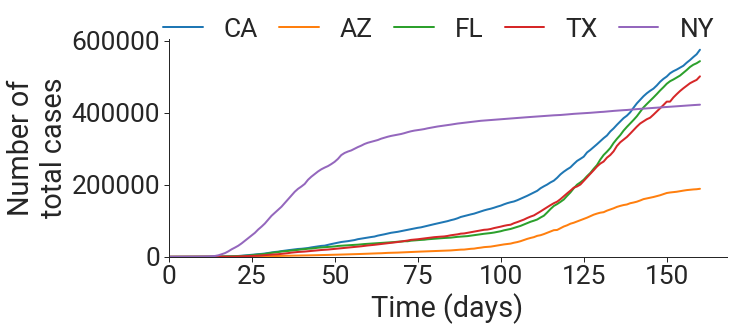

In [4]:
df = pd.read_csv("../data/usa_states.csv")
per_state_cases(df, states=["CA", "AZ", "FL", "TX", "NY"])

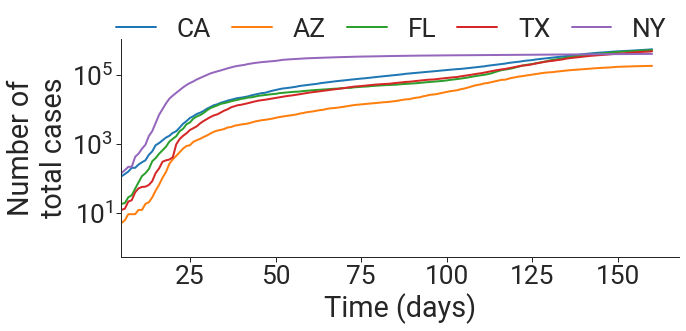

In [5]:
per_state_cases(df, states=["CA", "AZ", "FL", "TX", "NY"],
                log_scale=True)

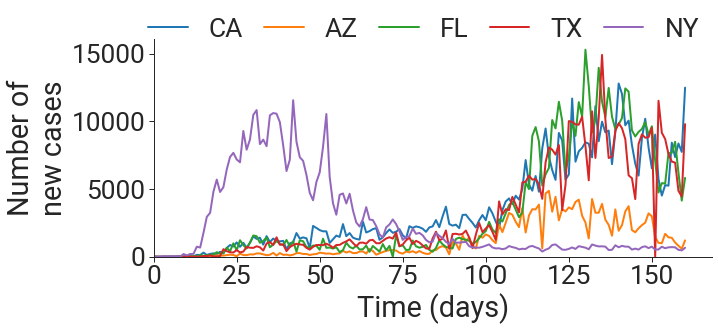

In [6]:
per_state_cases(df, states=["CA", "AZ", "FL", "TX", "NY"],
                cumulative=False)

CA [5.704 5.562 5.695 5.778 6.244]
AZ [15.531 13.415 12.786 12.577 12.467]
FL [17.738 17.471 17.257 17.267 17.167]
TX [16.197 19.253 20.093 20.413 24.233]
NY [0.965 0.97  0.953 0.934 0.906]


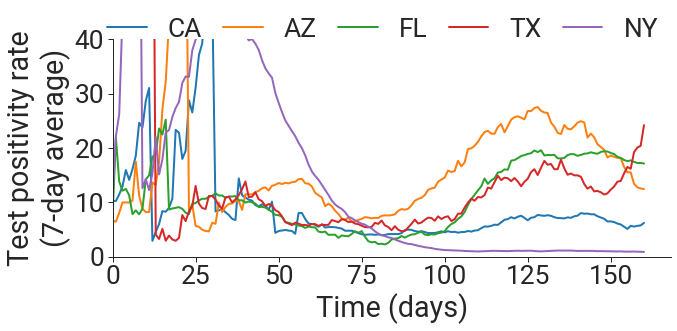

In [7]:
per_state_positivity_rate(df, states=["CA", "AZ", "FL", "TX", "NY"])